# <center>HW1</center> #
####  107000105 楊晶宇
***

## <u>Question 1</u>

### Implementation

##### 1.引用函式庫

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import math 

##### 2.定義平均、標準差、標準化函式

######  (1)平均值

In [2]:
def Mean(l):                # l是要算的數值(list)
    total = 0
    for i in l:
        total += i
    return total / len(l)    

###### (2)標準差

In [3]:
def Dev(l, M):            # l是要算的數值(list)， M是要算的數值的平均
    total = 0             #存 (數值 - 平均)的平方的總和
    for i in l:
        total += math.pow((i - M),2) 
    return math.sqrt(total / len(l))

###### (3)標準化

In [4]:
def Std(x, M, D):
    return (x - M) / D

##### 3.宣告變數、定義dic方便對照字串

In [5]:
feature_dic = {0:'sepal length', 1:'sepal width', 2:'petal length', 3:'petal width'}
class_dic = {0:'Setosa', 1:'Versicolour', 2:'Virginica'}
M = []
D = []
std_dic = {}  #給標準化後的data

##### 4.讀取檔案

In [6]:
df = pd.read_csv('iris.data', header=None, encoding='utf-8')

### Result

##### 1.算平均與標準差
* M, D是拿來存每一個feature的Mean和Deviation的list，方便之後標準化用
* for loop 拿來跑4個feature

In [7]:
for j in range(3):
    for i in range(4):
        M.append(Mean(df.loc[df[4] == j, i]))
        D.append(Dev(df.loc[df[4] == j, i],Mean(df.loc[df[4] == j, i])))
        print('Mean of ' + feature_dic[i] + ' of ' + class_dic[j] + ': ' + str(M[i + j*4]))
        print('Standard deviation of ' + feature_dic[i] + ' of ' + class_dic[j] + ': ' + str(D[i + j*4]))
        print()

Mean of sepal length of Setosa: 5.005999999999999
Standard deviation of sepal length of Setosa: 0.348946987377739

Mean of sepal width of Setosa: 3.4180000000000006
Standard deviation of sepal width of Setosa: 0.37719490982779713

Mean of petal length of Setosa: 1.464
Standard deviation of petal length of Setosa: 0.17176728442867115

Mean of petal width of Setosa: 0.2439999999999999
Standard deviation of petal width of Setosa: 0.10613199329137278

Mean of sepal length of Versicolour: 5.936
Standard deviation of sepal length of Versicolour: 0.5109833656783752

Mean of sepal width of Versicolour: 2.7700000000000005
Standard deviation of sepal width of Versicolour: 0.31064449134018135

Mean of petal length of Versicolour: 4.26
Standard deviation of petal length of Versicolour: 0.4651881339845204

Mean of petal width of Versicolour: 1.3259999999999998
Standard deviation of petal width of Versicolour: 0.19576516544063702

Mean of sepal length of Virginica: 6.587999999999998
Standard deviati

##### 2.標準化數值
* std_dic拿來存標準化後的數據，update 4次4個feature(df[0:3])裡的所有值x
* 第三行是把種類(column 4)原封不動丟進去

In [8]:
for j in range(3):
    for i in range(4):
        std_dic.update({str(i) : [Std(x, M[i + j*4], D[i + j*4]) for x in df.loc[df[4] == j, i]]})
    std_dic.update({'4' : j})
    std_df = pd.DataFrame(std_dic)
    print('std of features of '+ class_dic[j] + ' : ')
    print(std_df)

std of features of Setosa : 
           0         1         2         3  4
0   0.269382  0.217394 -0.372597 -0.414578  0
1  -0.303771 -1.108180 -0.372597 -0.414578  0
2  -0.876924 -0.577951 -0.954780 -0.414578  0
3  -1.163501 -0.843065  0.209586 -0.414578  0
4  -0.017195  0.482509 -0.372597 -0.414578  0
5   1.129111  1.277854  1.373952  1.469868  0
6  -1.163501 -0.047721 -0.372597  0.527645  0
7  -0.017195 -0.047721  0.209586 -0.414578  0
8  -1.736653 -1.373295 -0.372597 -0.414578  0
9  -0.303771 -0.843065  0.209586 -1.356801  0
10  1.129111  0.747624  0.209586 -0.414578  0
11 -0.590348 -0.047721  0.791769 -0.414578  0
12 -0.590348 -1.108180 -0.372597 -1.356801  0
13 -2.023230 -1.108180 -2.119146 -1.356801  0
14  2.275417  1.542969 -1.536963 -0.414578  0
15  1.988841  2.603429  0.209586  1.469868  0
16  1.129111  1.277854 -0.954780  1.469868  0
17  0.269382  0.217394 -0.372597  0.527645  0
18  1.988841  1.012739  1.373952  0.527645  0
19  0.269382  1.012739  0.209586  0.527645  0
20  1

### Discussion

一開始不是很熟悉pandas的檔案格式<br>
所以利用print()跟type()試了很多次來了解語法<br>
熟悉後就比較順了<br>
把題目要的功能寫成functions，比較易讀易懂<br>
利用dictionary的方便性，在print Mean跟deviation的時候省了很多行code<br>
讓code乾淨很多

## <u>Question 2</u>

### Implementation

##### 1.定義畫圖的函式
>根據題目要求，需要畫出2個類別2個特徵值的散點圖
* c 是類別的編號list(根據上面的class_dic)，如：若要比較Setosa和Virginica，c 要輸入 [0, 2]
* f 是特徵的編號list(根據上面的feature_dic)
* X1, Y1是種類1(c[0])的兩個特徵(f[0], f[1])以此類推

In [9]:
def Plot(c, f, df):                 # c is class number list, f is feature number list, df is dataframe in 
    x1 = df.loc[df[4]== c[0], f[0]] # if c[0] = 0, f[0] = 0, x1 is Setosa sepal length list
    y1 = df.loc[df[4]== c[0], f[1]] 
    x2 = df.loc[df[4]== c[1], f[0]]
    y2 = df.loc[df[4]== c[1], f[1]]
    plt.scatter(x1, y1,
                color='red',
                marker='o',
                label=class_dic[c[0]]) # if c[0] = 0, lebel = 'Setosa'                                  
    plt.scatter(x2, y2,
                color='blue',
                marker='o',
                label=class_dic[c[1]])     
    plt.xlabel(feature_dic[f[0]] + ' [cm]') # if f[0] = 0, xlebel is 'sepal lenth'
    plt.ylabel(feature_dic[f[1]] + ' [cm]')
    plt.legend(loc='upper left')
    plt.show()

### Result
* feature_dic = {0:'sepal length', 1:'sepal width', 2:'petal length', 3:'petal width'}
* class_dic = {0:'Setosa', 1:'Versicolour', 2:'Virginica'}

###### 1. (sepal width, petal width) of setosa and veriscolor

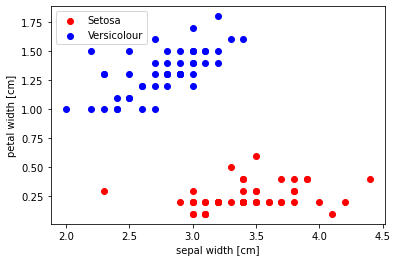

In [10]:
Plot([0,1],[1,3], df) 

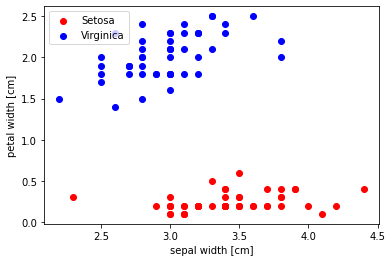

In [11]:
Plot([0,2],[1,3], df) 

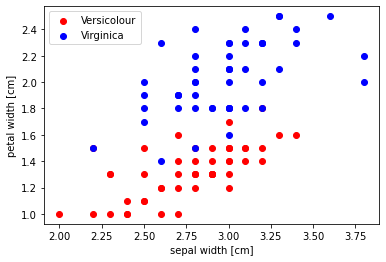

In [12]:
Plot([1,2],[1,3], df) 

##### 2.(sepal length, petal width) of veriscolor and virginica

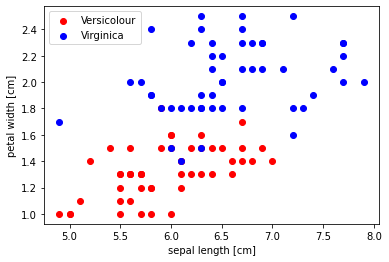

In [13]:
Plot([1,2],[0,3], df)

##### 3.(sepal length, petal length) of veriscolor and setosa.

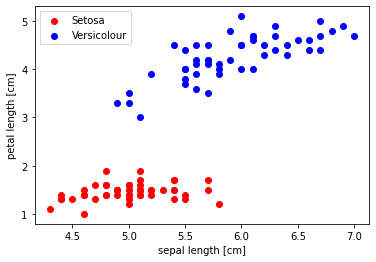

In [14]:
Plot([0,1],[0,2], df)

### Discussion

原本想要複製三次code改裡面係數 <br>
後來決定把畫圖的功能透過dictionary簡化成一個funtion<br>
省了很多行code，一行plot一題<br>
<br>
原本print data的時候看得一頭霧水<br>
也沒有感覺特徵跟類別的關聯性<br>
但一畫圖分析就發現有些分界線很明顯<br>
透過這次作業也讓我了解圖形化的重要性<br>
能夠快速掌握資料的性質、分布<br>
在之後才方便選擇後續分析的方式<br>